Supervised machine learning is a category of machine learning that is concered with using labelled data sets to train algorithms and have them learn patterns 
in order to classify data or predict outcomes.

Labelled data consists of pair elements, each pair consists of input data and a desired outcome. This provides the "ground truth" from which the algorithm learns.   

The training dataset contains labelled data which is "fed" to the algorithm in order for it to grasp certain patterns in the data. 
This process is repeated many times, and during training the algorithm adjusts its parameters in order to minimize the difference between it and the actual labels in the dataset.

On the other hand, the test datasets are used to evaluate the performance of the trained model, they include examples which were not used in the training process
which the algorithm uses to generate an outcome which is then compared to the desired output in the test data. This evaluation presents an opportunity to test 
the algorithms on new, unseen data.

In [1]:
import pandas as pd # type: ignore
df = pd.read_csv("FIT1043-MusicGenre-Dataset.csv")

# Selecting certain columns and assigning them to variables
labels = df['music_genre']
features = df.drop(columns=['instance_id','artist_name','track_name','music_genre'])

# ANother way to do the same as the previous lines
X = df.iloc[:,[3,4,5,6,7,8,9,10,11,12,13]].values #Input Data : Popularity... Valence
Y = df.iloc[:,[14]].values                        #Labelled Data : Genre

In [2]:
from sklearn.model_selection import train_test_split # type: ignore

# Splitting the data into test and train sets
X_train, X_test, Y_train, Y_test = train_test_split(features,labels,test_size=0.25, random_state= 0)  

Binary classification includes determining whether input data falls into in one or two classes, such as medical diagnosis where the patient can or cannot have the disease,
these two are usually referred to as the positive or negative class.
Whereas in multi-class classification the problem includes classifying instances into more than two classes such as, the example we are currently working on, musical genres or car types.  

Since the raw data we input into the learning algorithms can have fields with a wide range of values, we need to perform Feature Scaling/Normalization in order to
 control the effect each field has on the algorithm and stop any certain one from dominating the decision making process. The data is converted from having all kinds of values
  to a set of data that has a mean of 0 and a specific standard deviation, which is usally 1, meaning that all values don't stray away that much from the mean.
This allows the algorithm to take into consideration all kinds of input data equally, which will improve the general performance and accuracy of the algorithm
(Side-note, some algorithms do not neccesarily require normalization such as tree based models, but in some cases it could improve their performance). 

In [3]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer# type: ignore

# I tried using multiple scaler variants and these two worked the best for me. Robust Scaler seems to handle outliers better than other options.

sc = StandardScaler()
rb = RobustScaler()
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)
X_train4 = rb.fit_transform(X_train)
X_test4 = rb.transform(X_test)

# Extra Code:
#ma = MaxAbsScaler()
#mm = MinMaxScaler()
#qt = QuantileTransformer()


Support Vector Machines are a group of supervised machine learning algorithms that are commonly used in classification, regression and outlier detection tasks. 
They mainly rely on finding the optimal hyperplane which best seperates data points in the feature space. They are effective for linear and nonlinear 
 data classifications as they have the ability to separate data points by using hyperplanes or nonlinear decision boundaries that are created using complex algorithms.

A Kernel is a function that allows SVMs to handle the previously mentioned nonlinear decision boundaries by projecting data points that follow a curved shape onto a higher- 
dimensional space in which a linear decision boundary or path can be used to effectively separate different classes.

In [4]:
from sklearn import svm # type: ignore
from sklearn.metrics import accuracy_score # type: ignore

In [5]:
# Instantiate the Support Vector Machine Object
svm_rbf = svm.SVC(kernel='rbf',gamma=0.3,break_ties=True,shrinking=False)

# Train and predict
svm_rbf.fit(X_train1, Y_train)
y_pred_rbf = svm_rbf.predict(X_test1)

# Calculate Accuracy
accuracy_rbf = accuracy_score(Y_test, y_pred_rbf)
print("Accuracy of SVM with RBF kernel:", accuracy_rbf)


Accuracy of SVM with RBF kernel: 0.565331278890601


In [44]:
from sklearn.ensemble import GradientBoostingClassifier #type: ignore
import numpy as np                                      #type: ignore
from sklearn.model_selection import KFold               #type: ignore
from sklearn.metrics import accuracy_score, confusion_matrix #type: ignore

# Building a machine learning model without the cross validation caused the predictions to always be a certain genre
# hence I will be using cross validation to ensure that a cerain field does not overpower the others.

# Creating the Classifier
gb = GradientBoostingClassifier(loss='log_loss',validation_fraction=0.5)
# Initializing Kfold object that is going to be used to perform cross validation on the dataset 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
conf_matrices = []

# Iterate over each fold
for train_index, val_index in kf.split(X):
    # Splits the data into training and validation sets for current fold
    X_train_fold, X_test_fold = X[train_index], X[val_index]
    Y_train_fold, Y_test_fold = Y[train_index], Y[val_index]
    
    # Train and predict for current fold
    gb.fit(X_train_fold, Y_train_fold)
    y_test_pred = gb.predict(X_test_fold)
    
    # Calculate accuracy for the fold and add it to the list
    accuracy = accuracy_score(Y_test_fold, y_test_pred)
    accuracy_scores.append(accuracy)

avg_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", avg_accuracy)


C:\Users\darra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\darra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\darra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

Average Accuracy: 0.5796669757631363


In [45]:
gb_pred = gb.predict(X_test)
accuracy = accuracy_score(Y_test, gb_pred)
print(accuracy, "<- Accuracy")

0.6362095531587058 <- Accuracy


C:\Users\darra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [ ]:
submission_data = pd.read_csv('FIT1043-MusicGenre-Submission.csv')
submission_features = submission_data.drop(columns=['instance_id','artist_name','track_name'])

predicted_genres = gb.predict(submission_features)

submission_df = pd.DataFrame({'instance_id': submission_data['instance_id'], 'music_genre': predicted_genres})
submission_df.to_csv('Darras_predicted_music_genres.csv', index=False)

C:\Users\darra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [22]:
svm_poly = svm.SVC(kernel='poly',degree=3, gamma='scale')
svm_poly.fit(X_train4, Y_train)
y_pred_poly = svm_poly.predict(X_test4)
accuracy_poly = accuracy_score(Y_test, y_pred_poly)
print("Accuracy of SVM with poly kernel:", accuracy_poly)

Accuracy of SVM with poly kernel: 0.44052388289676425


In [23]:
from sklearn.tree import DecisionTreeClassifier #type: ignore

classifier2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier2.fit(X_train4, Y_train)
Y_pred2 = classifier2.predict(X_test4)

accuracy2 = accuracy_score(Y_test, Y_pred2)
print(accuracy2, "<- Decision Tree Accuracy")

0.44052388289676425 <- Decision Tree Accuracy


In [41]:
from sklearn.metrics import confusion_matrix # type: ignore
cm_rbf = confusion_matrix(Y_test, y_pred_rbf) 
cm_rbf

array([[236,   3,  11,   1, 107,  36,  68,  36,  27, 133],
       [ 18, 477,  50,  36,  15,  26,   0,  13,   0,   4],
       [ 32,  88, 343,   9,  67,  31,   1,  77,   1,  28],
       [ 15,  23,  17, 565,   4,  10,   0,  29,   0,   6],
       [ 39,  10,  42,   1, 348,  17,  19,  49,   8, 105],
       [ 37,  28,  29,   7,  32, 379,  17,  73,   9,  20],
       [ 27,   0,   0,   0,   6,   4, 317,  12, 231,  42],
       [ 22,  11,  81,  46,  38,  90,  24, 337,   3,  23],
       [ 25,   0,   0,   0,   5,   2, 284,   7, 226,  83],
       [ 67,   0,   3,   2,  36,   9,  25,  15,  34, 441]], dtype=int64)

In [42]:
cm_gb = confusion_matrix(Y_test,gb_pred)
cm_gb

array([[268,   2,   5,   0,  84,  28,  56,  44,  22, 149],
       [ 19, 511,  44,  19,  19,  13,   0,   8,   0,   6],
       [ 39,  42, 402,   9,  54,  32,   4,  68,   0,  27],
       [ 17,  16,  17, 578,   3,   8,   0,  26,   0,   4],
       [ 45,   4,  24,   0, 410,   5,   7,  33,  15,  95],
       [ 54,  16,  40,   3,  21, 403,   7,  56,   6,  25],
       [ 18,   0,   0,   0,   7,   4, 381,   5, 189,  35],
       [ 27,   5,  70,  43,  33,  78,  14, 370,   6,  29],
       [ 14,   0,   0,   0,   8,   3, 195,   3, 324,  85],
       [ 49,   0,   1,   1,  24,   5,  26,  10,  34, 482]], dtype=int64)

Section B

Link to the used database: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [13]:
import matplotlib.pyplot as plt  #type:ignore
%matplotlib inline 
df = pd.read_csv('StudentsPerformance.csv') 
df.head() 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df.shape 

(1000, 8)

Text(0.5, 0, 'Math score compared to Reading score')

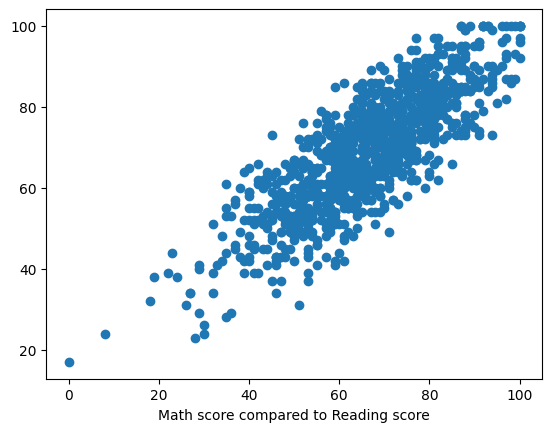

In [15]:
plt.scatter(x=df['math score'],y=df['reading score']) 
plt.xlabel('Math score compared to Reading score') 

In [16]:
from sklearn.cluster import KMeans #type:ignore

Kmeans = KMeans(n_clusters=4).fit(df[['math score','reading score']])

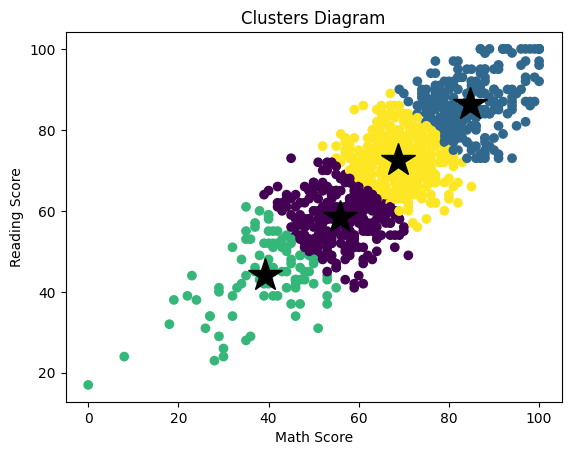

In [17]:
plt.scatter(x=df['math score'], y=df['reading score'],c=Kmeans.labels_) 
plt.plot(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], 'k*', markersize=25) 
plt.xlabel('Math Score') 
plt.ylabel('Reading Score') 
plt.title("Clusters Diagram")
plt.show()

There Seems to be a positive corelation between these two fields, the better a student is at math the more likely they are better at reading. The top cluster has students that excel at both skills and the bottom one has the students that performed poorly. Furthermore, there are the two middle clusters that include the scores of an average student with some variation of course.

I chose to split up the data into 4 clusters to be able to get each quarterly percentile which could be used to figure out what grade to give to each student in a threshold grading system. 
